In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import pandas as pd

In [2]:
file_buffered = Path("local/latency_buffered.csv")
file_unbuffered = Path("local/latency_unbuffered.csv")
figdir = Path("images")

buffered = pd.read_csv(str(file_buffered))
unbuffered = pd.read_csv(str(file_buffered))

In [3]:
# calculate the min latency to transfer 16-bit image sized 640 x 480 pixels at 400 MB/s
# 400 MB/s = 400 bytes/us

min_lat_us = 640 * 480 * 2 / 400
min_lat_us

1536.0

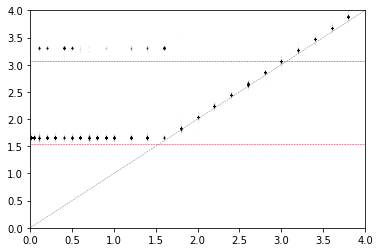

In [4]:
plt.figure()
for value, group in unbuffered.groupby(["exposure"]):
    exp = np.array(group.exposure)/1000
    lat = np.array(group.latency)*1000
    plt.plot(exp, lat, "k.", ms=1, alpha=0.03)
plt.plot(buffered.exposure/1000, buffered.exposure/1000, "--", lw=0.5, color="gray")
plt.hlines(min_lat_us/1000, buffered.exposure.min()/1000, buffered.exposure.max()/1000,
           linewidth=0.5, linestyle="--", color='crimson')
plt.hlines(min_lat_us*2/1000, buffered.exposure.min()/1000, buffered.exposure.max()/1000,
           linewidth=0.5, linestyle="--", color='brown')
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.show()

exposure=0.010 ms: 0 frames were >3 ms
exposure=0.050 ms: 0 frames were >3 ms
exposure=0.100 ms: 0 frames were >3 ms
exposure=0.200 ms: 0 frames were >3 ms
exposure=0.300 ms: 0 frames were >3 ms
exposure=0.400 ms: 0 frames were >3 ms
exposure=0.500 ms: 0 frames were >3 ms
exposure=0.600 ms: 0 frames were >3 ms
exposure=0.700 ms: 0 frames were >3 ms
exposure=0.800 ms: 0 frames were >3 ms
exposure=0.900 ms: 0 frames were >3 ms
exposure=1.000 ms: 0 frames were >3 ms
exposure=1.200 ms: 0 frames were >3 ms
exposure=1.400 ms: 0 frames were >3 ms
exposure=1.600 ms: 0 frames were >3 ms
exposure=1.800 ms: 0 frames were >3 ms
exposure=2.000 ms: 0 frames were >3 ms
exposure=2.200 ms: 0 frames were >3 ms
exposure=2.400 ms: 0 frames were >3 ms
exposure=2.600 ms: 0 frames were >3 ms
exposure=2.800 ms: 0 frames were >3 ms
exposure=3.000 ms: 0 frames were >3 ms
exposure=3.200 ms: 1 frames were >3 ms
exposure=3.400 ms: 0 frames were >3 ms
exposure=3.600 ms: 1 frames were >3 ms
exposure=3.800 ms: 0 fram

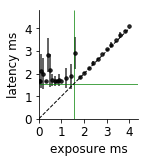

In [5]:
vmin = 0.0
vmax = 4.8
plt.figure(figsize=(2, 2))
for value, group in buffered.groupby(["exposure"]):
    exp = (value/1000, )
    lat = np.array(group.latency)[1:]*1000
    print(f"exposure={exp[0]:.3f} ms: {np.count_nonzero(lat>5)} frames were >3 ms")
    plt.errorbar(exp, (np.mean(lat),), yerr=np.std(lat, ddof=1),
                fmt="ko", ms=3.5, alpha=0.8)
plt.plot(buffered.exposure/1000, buffered.exposure/1000, "k--", lw=1)
plt.hlines(min_lat_us/1000, vmin, vmax,
           linewidth=1, linestyle="-", color='green', alpha=0.7)
plt.vlines(min_lat_us/1000, vmin, vmax,
           linewidth=1, linestyle="-", color='green', alpha=0.7)
plt.xlim(0, 4.4)
plt.ylim(0, 4.8)
plt.xticks((0, 1, 2, 3, 4))
plt.yticks((0, 1, 2, 3, 4))
plt.gca().set_aspect(1.0)
for side in ("top", "right"):
    plt.gca().spines[side].set_visible(False)
plt.tick_params(labelsize=12)
plt.xlabel("exposure ms", fontsize=12)
plt.ylabel("latency ms", fontsize=12)
plt.show()

In [6]:
exposure_ms = []
latency_ms  = []
vrange = (0, 5) # 0 ms to 5 ms
nbins  = 50 # 100 us bin
for value, group in unbuffered.groupby(["exposure"]):
    H, edges = np.histogram(np.array(group.latency)*1000, bins=nbins, range=vrange, density=False)
    exposure_ms.append(value/1000)
    latency_ms.append(H/(group.shape[0]))
exposure_ms = np.array(exposure_ms)
exp_edges   = np.concatenate(((0,), (exposure_ms[1:] + exposure_ms[:-1])/2, (vrange[1],)))
latency_ms  = np.stack(latency_ms, axis=-1)

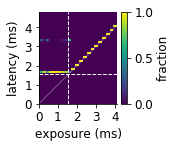

In [7]:
vmin = 0.0
vmax = 4.8
fig = plt.figure(figsize=(2.5, 2.2))
grid = GridSpec(1,22)
ax_plot = fig.add_subplot(grid[:,:20])
ax_bar  = fig.add_subplot(grid[:,20:])
for i in range(latency_ms.shape[1]):
    img = ax_plot.imshow(latency_ms[:,i].reshape((-1,1)), vmin=0.0, vmax=1,
               origin="lower", cmap=plt.get_cmap("viridis"),
               extent=(exp_edges[i], exp_edges[i+1], vrange[0], vrange[1]))
ax_plot.plot(buffered.exposure/1000, buffered.exposure/1000, "-", color="w", lw=0.3, alpha=1)
ax_plot.hlines(min_lat_us/1000, vmin, vmax,
           linewidth=1, linestyle="--", color='w', alpha=1)
ax_plot.vlines(min_lat_us/1000, vmin, vmax,
           linewidth=1, linestyle="--", color='w', alpha=1)
ax_plot.set_xlim(0, 4.1)
ax_plot.set_ylim(0, vmax)
ax_plot.set_xticks((0, 1, 2, 3, 4))
ax_plot.set_yticks((0, 1, 2, 3, 4))
ax_plot.set_aspect(1.0)
cb = fig.colorbar(img, cax=ax_bar)
cb.set_ticks((0, 0.5, 1.0))
for side in ("top", "right"):
    ax_plot.spines[side].set_visible(False)
for ax in (ax_plot, ax_bar):
    ax.tick_params(labelsize=12)
ax_plot.set_xlabel("exposure (ms)", fontsize=12)
ax_plot.set_ylabel("latency (ms)", fontsize=12)
cb.set_label("fraction", fontsize=12)
plt.subplots_adjust(bottom=0.3, left=0.2, right=0.7, wspace=1)

outpath = figdir / "latency_ImagingSource-DMK37BUX287_Corei7-9700K"
if not outpath.parent.exists():
    outpath.parent.mkdir(parents=True)
fig.savefig(str(outpath.with_suffix(".png")), dpi=400)
fig.savefig(str(outpath.with_suffix(".svg")))
plt.show()